In [1]:
import sys
import os

sys.path.append(os.path.join(os.getcwd(), 'HC701-PROJECT'))
sys.path.append('../../')

from hc701fed.dataset.EyePACS_and_APTOS import Eye_APTOS
from hc701fed.dataset.messidor import MESSIDOR

from torch.utils.data import ConcatDataset

import yaml

from hc701fed.transform.transforms import compose
from hc701fed.model import baseline
from hc701fed.dataset.WeightedConcatDataset import WeightedConcatDataset

PATH_DATA = '/home/hong/hc701'
transforms_file = open(os.path.join(PATH_DATA, "HC701-PROJECT/hc701fed/params/transforms.yaml"), "r")
transforms_params = yaml.load(transforms_file, Loader=yaml.FullLoader)
train_transforms = compose(
    transforms_strs=transforms_params["train"],
)



Eye_APTOS_data_dir_options = {
    'EyePACS': os.path.join(PATH_DATA, 'preprocessed/eyepacs'),
    'APTOS': os.path.join(PATH_DATA, 'preprocessed/aptos'),
}

MESSIDOR_data_dir_options = {
    'messidor2': os.path.join(PATH_DATA, 'preprocessed/messidor2'),
    'messidor_pairs' : os.path.join(PATH_DATA, 'preprocessed/messidor/messidor_pairs'),
    'messidor_Etienne' : os.path.join(PATH_DATA, 'preprocessed/messidor/messidor_Etienne'),
    'messidor_Brest-without_dilation' : os.path.join(PATH_DATA, 'preprocessed/messidor/messidor_Brest-without_dilation')
}


APTOS_train = Eye_APTOS(data_dir=Eye_APTOS_data_dir_options['APTOS'], mode='train', transform=train_transforms)
EyePACS_train = Eye_APTOS(data_dir=Eye_APTOS_data_dir_options['EyePACS'], mode='train', transform=train_transforms)
MESSIDOR_2_train = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor2'], mode='train', transform=train_transforms)
MESSIDOR_pairs_train = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_pairs'], mode='train', transform=train_transforms)
MESSIDOR_Etienne_train = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_Etienne'], mode='train', transform=train_transforms)
MESSIDOR_Brest_train = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_Brest-without_dilation'], mode='train', transform=train_transforms)

Centerlized_train = WeightedConcatDataset([APTOS_train, EyePACS_train, MESSIDOR_2_train, MESSIDOR_pairs_train, MESSIDOR_Etienne_train,MESSIDOR_Brest_train])

horizontal_flip {'p': 0.5}
random_rotation {'degrees': [-10, 10]}


In [2]:
model = baseline.Baseline(backbone='resnet50')

In [5]:
for p in model.parameters():
    print(p.detach())

tensor([[[[ 8.3249e-03,  2.8562e-02,  1.9534e-02,  ..., -4.8804e-02,
           -9.6406e-03,  1.0822e-02],
          [-3.6442e-02,  7.3035e-02, -6.1080e-04,  ..., -1.0023e-01,
           -6.7153e-02,  3.0907e-02],
          [-6.2699e-03,  1.1590e-01,  9.7606e-02,  ..., -1.9845e-02,
           -1.8221e-03,  9.7530e-02],
          ...,
          [ 1.6269e-02,  2.7184e-01,  5.4999e-01,  ...,  5.5690e-01,
            6.5946e-01,  5.1294e-01],
          [-1.4853e-02,  1.1854e-01,  2.1143e-01,  ...,  3.3957e-01,
            3.8925e-01,  3.1459e-01],
          [-4.7338e-02,  1.3811e-02, -4.5144e-02,  ..., -9.2893e-02,
           -1.6902e-02,  1.0397e-01]],

         [[ 3.8145e-02,  1.0174e-01, -1.0502e-02,  ..., -9.1463e-02,
           -1.8363e-03,  9.0304e-02],
          [-3.5637e-02,  7.9255e-02,  2.8483e-02,  ..., -6.1787e-02,
           -5.5839e-02,  6.1934e-02],
          [ 2.5016e-02,  1.5750e-01,  1.0785e-01,  ...,  7.2521e-02,
            1.5945e-04,  5.7769e-02],
          ...,
     

In [2]:
APTOS_test = Eye_APTOS(data_dir=Eye_APTOS_data_dir_options['APTOS'], mode='test', transform=train_transforms)
EyePACS_test = Eye_APTOS(data_dir=Eye_APTOS_data_dir_options['EyePACS'], mode='test', transform=train_transforms)
MESSIDOR_2_test = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor2'], mode='test', transform=train_transforms)
MESSIDOR_pairs_test = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_pairs'], mode='test', transform=train_transforms)
MESSIDOR_Etienne_test = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_Etienne'], mode='test', transform=train_transforms)
MESSIDOR_Brest_test = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_Brest-without_dilation'], mode='test', transform=train_transforms)

Centerlized_test = ConcatDataset([APTOS_test, EyePACS_test, MESSIDOR_2_test, MESSIDOR_pairs_test, MESSIDOR_Etienne_test,MESSIDOR_Brest_test])

In [2]:
len(Centerlized_train)

22149

In [3]:
sum([1,2,3])

6

In [3]:
from torch.utils.data import DataLoader
for i,j in DataLoader(Centerlized_test, batch_size=1, shuffle=True):
    print(j.type())

torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.DoubleTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTensor
torch.LongTe

In [2]:
APTOS_train_str = str(APTOS_train)

In [3]:
APTOS_train_str

'<hc701fed.dataset.EyePACS_and_APTOS.Eye_APTOS object at 0x7fbc7820eb50>'

In [2]:
APTOS_train = Eye_APTOS(data_dir=Eye_APTOS_data_dir_options['APTOS'], mode='train', transform=train_transforms)

In [3]:
APTOS_train = Eye_APTOS(data_dir=Eye_APTOS_data_dir_options['APTOS'], mode='train', transform=train_transforms)
from torch.utils.data import DataLoader
for i,j in DataLoader(APTOS_train, batch_size=1, shuffle=True):
    print(i,j)
    break

tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],

         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]]) tensor([2])


In [2]:
EyePACS_train = Eye_APTOS(data_dir=Eye_APTOS_data_dir_options['EyePACS'], mode='train', transform=train_transforms)

TypeError: 'int' object is not subscriptable

In [2]:
for i in Centerlized_train:
    print(i)
    break

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]],

        [[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]]), 2)


In [3]:
import numpy as np
np.load('/home/hong/hc701/preprocessed/aptos/test/e4dcca36ceb4.npy', allow_pickle=True).item()

{'image': array([[[2, 2, 2],
         [2, 2, 2],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [2, 1, 3],
         [1, 0, 2]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [0, 0, 1],
         [0, 0, 1]],
 
        [[1, 1, 1],
         [1, 1, 1],
         [1, 1, 1],
         ...,
         [1, 1, 1],
         [0, 0, 1],
         [0, 0, 1]],
 
        ...,
 
        [[3, 3, 3],
         [0, 0, 0],
         [1, 1, 1],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 'label': 0}

In [5]:
from torch.utils.data import DataLoader
for i , j in DataLoader(Centerlized_train, batch_size=1, shuffle=True):
    print(j)
    break

TypeError: pic should be Tensor or ndarray. Got <class 'list'>.

In [ ]:
APTOS_Val = Eye_APTOS(data_dir=Eye_APTOS_data_dir_options['APTOS'], mode='val', transform = None)
EyePACS_Val = Eye_APTOS(data_dir=Eye_APTOS_data_dir_options['EyePACS'], mode='val', transform = None)
MESSIDOR_2_Val = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor2'], mode='val', transform = None)
MESSIDOR_pairs_Val = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_pairs'], mode='val', transform = None)
MESSIDOR_Etienne_Val = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_Etienne'], mode='val', transform = None)
MESSIDOR_Brest_Val = MESSIDOR(data_dir=MESSIDOR_data_dir_options['messidor_Brest-without_dilation'], mode='val', transform = None)


In [2]:
test = MESSIDOR_Brest_train.calculate_weights()

In [3]:
print(test)
print(test.shape)

tensor([0.4849, 1.6071, 1.1968, 2.0833])
torch.Size([4])


In [2]:
test1 = np.load("/home/hong/hc701/preprocessed/eyepacs/train/10_left.npy", allow_pickle=True).item()

In [3]:
from torchvision import transforms
test2= transforms.ToTensor()(test1['image'])

In [9]:
labels = [3,1,2,0,0,3,3,2,2,1]
list(set(labels))

[0, 1, 2, 3]

In [4]:
test1['image'].shape

(224, 224, 3)

In [5]:
demo_array = np.moveaxis(test2.numpy()*255, 0, -1)

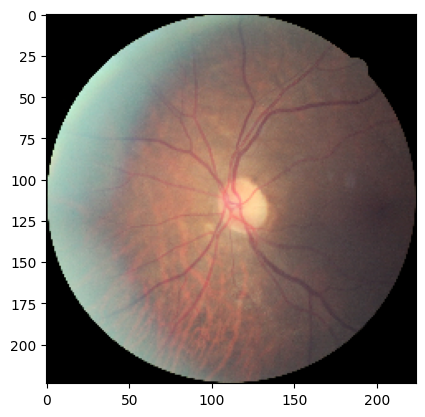

In [7]:
plt.imshow(demo_array.astype(np.uint8))

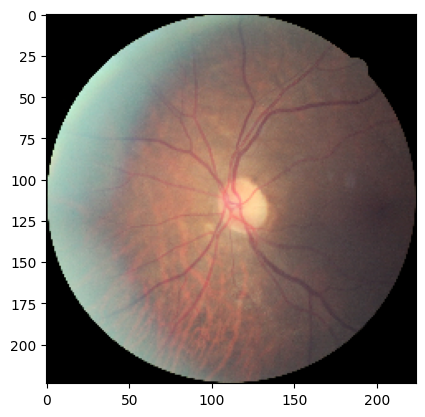

In [30]:
plt.imshow(test1["image"])

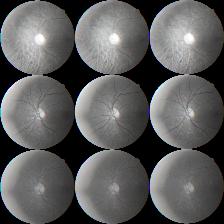

In [6]:
import yaml

import sys
sys.path.append("../../")
from hc701fed.transform.transforms import compose

transforms_file = open("/home/hong/hc701/HC701-PROJECT/hc701fed/params/transforms.yaml", "r")
transforms_params = yaml.load(transforms_file, Loader=yaml.FullLoader)
train_transforms = compose(
    transforms_strs=transforms_params["train"],
)

horizontal_flip {'p': 0.5}
random_rotation {'degrees': [-10, 10]}


In [7]:
train_transforms

Compose(
    RandomHorizontalFlip(p=0.5)
    RandomRotation(degrees=[-10.0, 10.0], interpolation=nearest, expand=False, fill=0)
    ToTensor()
)

In [12]:
from PIL import Image
# transform numpy array to PIL image
img = Image.fromarray(test1['image'])

In [17]:
import timm
model = timm.create_model('resnet18', pretrained=False, num_classes=1)

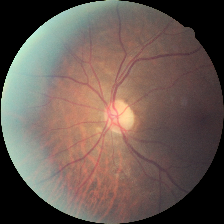

In [13]:
img

In [14]:
img = train_transforms(img)

In [2]:
import pandas as pd
df = pd.read_csv("/home/hong/hc701/raw_data/aptosdata/test.csv")

In [4]:
df['diagnosis'][1]

2

In [9]:
import numpy as np
import os

PATH_DATA = '/home/hong/hc701/preprocessed/eyepacs/test'
for i in os.listdir(PATH_DATA):
    label = np.load(os.path.join(PATH_DATA, i), allow_pickle=True).item()['label']
    print(label.dtype)

AttributeError: 'int' object has no attribute 'dtype'